In [17]:
%load_ext autoreload
%autoreload 2

from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber
from mmfsim.speckle import GrinSpeckle
from mmfsim.transforms import fresnel_transform, fourier_transform

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


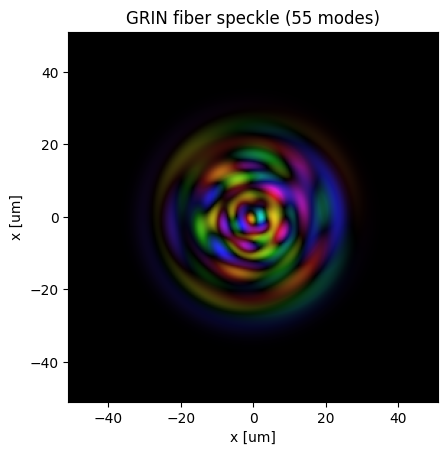

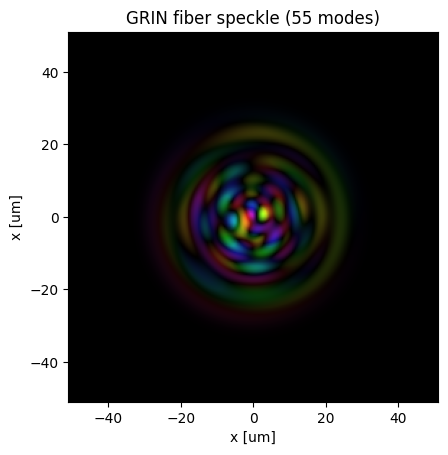

In [54]:
grid = Grid(pixel_size=0.4e-6, pixel_numbers=(256,256))
fiber = GrinFiber()
s = GrinSpeckle(fiber, grid, N_modes=55)
s.compose()

ft_s = fourier_transform(s.field, pad=2)
sf = deepcopy(s)
sf.field = ft_s

_ = s.plot(complex=True, complex_hsv=True, display_core=False)
_ = sf.plot(complex=True, complex_hsv=True, display_core=False)

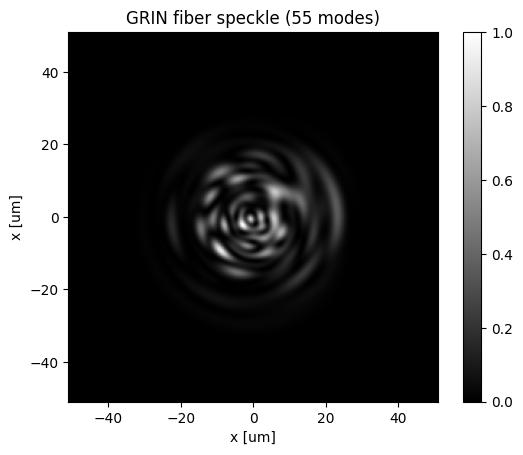

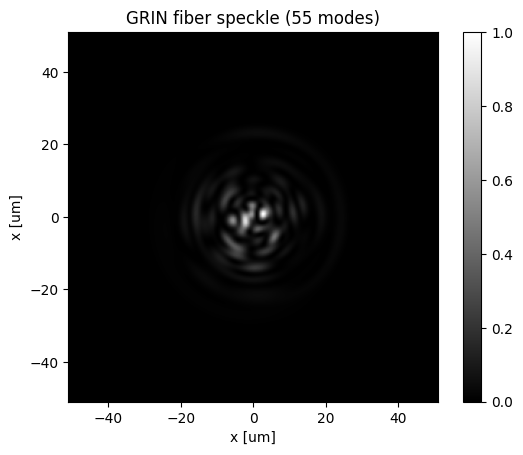

In [58]:
si = deepcopy(s)
sfi = deepcopy(sf)

si.field = np.abs(si.field)
sfi.field = np.abs(sfi.field)

_ = si.plot(complex=False, complex_hsv=True, display_core=False)
_ = sfi.plot(complex=False, complex_hsv=True, display_core=False)

Energies:
 - Initial: 1.0005675117822772
  - Fourier: 0.9998600460729061



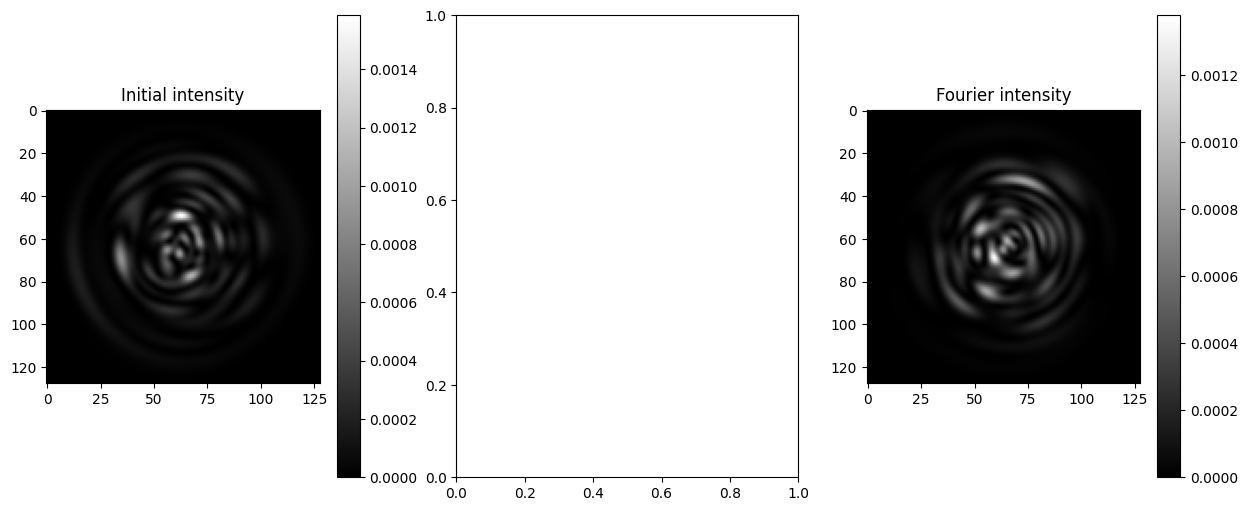

In [19]:
field = speckle.field


print("Energies:\n"
      f" - Initial: {np.sum(np.abs(field)**2)}\n",
      f" - Fourier: {np.sum(np.abs(ft_s)**2)}\n",
)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
pl0 = axs[0].imshow(np.square(np.abs(field)), cmap='gray')
axs[0].set_title("Initial intensity")
plt.colorbar(pl0, ax=axs[0])

pl2 = axs[2].imshow(np.square(np.abs(ft_s)), cmap='gray')
axs[2].set_title("Fourier intensity")
plt.colorbar(pl2, ax=axs[2])
plt.show()